In [1]:
import cv2, torch, os
from matplotlib import pyplot as plt
from SkylineExtraction.OneFormer import *

/home/mieszko/miniforge3/envs/diss/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_to_images = './images/'
image_dirs = os.listdir(path_to_images)
image_paths = [os.path.join(path_to_images, image_dir, "original.png") for image_dir in image_dirs]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

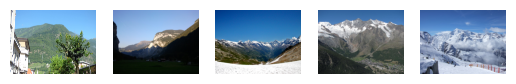

In [3]:
for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

In [4]:
pipeline = SkylinePipeline(device)
masks = []
for path in image_paths:
    image = cv2.imread(path)
    image = np.array(image)
    mask = pipeline.run_inference(image)
    masks.append(mask)

/home/mieszko/miniforge3/envs/diss/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025847130/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.


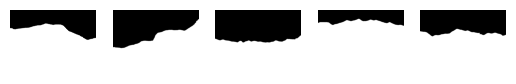

In [5]:
for i, mask in enumerate(masks):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')